<a href="https://colab.research.google.com/github/Mirucla/Applied-Data-Management/blob/main/In_Class_2_New_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, Lasso
from sklearn.metrics import mean_squared_error

# 1.) Import the data from CCLE into a new Google Colab file

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
import pandas as pd 
df=pd.read_csv("/content/gdrive/MyDrive/insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Converting the categorical variables into numerical variables 

In [5]:
df = pd.get_dummies(df, columns=["sex", "smoker", "region"])

df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [7]:
df.shape

(1338, 12)

#2.) Split the data into 80/20, in/out sample

In [8]:
X_in_sample, X_out_sample, y_in_sample, y_out_sample = train_test_split(df.drop('charges', axis=1), 
                                                    df['charges'], 
                                                    test_size=0.2, random_state=42)

In [10]:
X_in_sample.shape

(1070, 11)

In [11]:
X_out_sample.shape

(268, 11)

# 3.) Normalize the Data

In [26]:
scaler = StandardScaler()
X_in_sampleT = scaler.fit_transform(X_in_sample)
X_out_sampleT = scaler.transform(X_out_sample)

In [27]:
X_in_sampleT

array([[ 0.47222651, -1.75652513,  0.73433626, ...,  1.78316783,
        -0.59966106, -0.5723141 ],
       [ 0.54331294, -1.03308239, -0.91119211, ..., -0.56079971,
        -0.59966106, -0.5723141 ],
       [ 0.8987451 , -0.94368672, -0.91119211, ..., -0.56079971,
         1.66760869, -0.5723141 ],
       ...,
       [ 1.3252637 , -0.89153925, -0.91119211, ..., -0.56079971,
        -0.59966106, -0.5723141 ],
       [-0.16755139,  2.82086429,  0.73433626, ..., -0.56079971,
        -0.59966106,  1.74729228],
       [ 1.1120044 , -0.10932713, -0.91119211, ..., -0.56079971,
        -0.59966106,  1.74729228]])

# 4.) Get lambda from Lasso cross validation

In [29]:
lasso_cv = LassoCV(cv=5, random_state=42).fit(X_in_sampleT, y_in_sample)
optimal_lambda = lasso_cv.alpha_

In [30]:
optimal_lambda

115.53731053498068

# 5.) Run a lambda regression with that Lambda 

In [31]:
Regression = Lasso(alpha=optimal_lambda, random_state=42).fit(X_in_sampleT, y_in_sample)

In [32]:
Regression

Lasso(alpha=115.53731053498068, random_state=42)

# 6.) Plot the coefficients 

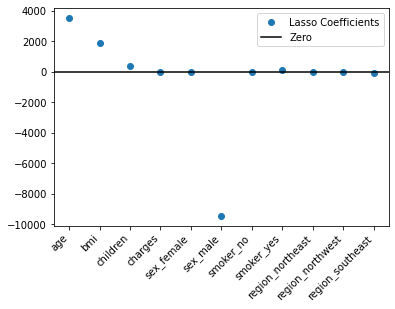

In [33]:
fig, ax = plt.subplots()
ax.plot(range(len(df.columns) - 1), Regression.coef_, marker='o', linestyle='', label='Lasso Coefficients')
ax.axhline(y=0, color='black', linestyle='-', label='Zero')
ax.set_xticks(range(len(df.columns) - 1))
ax.set_xticklabels(df.columns[:-1], rotation=45, ha='right')
ax.legend()
plt.show()

# 7.) Interpret the coefficients

In [22]:
# from the chart of coefficents, we observe that AGE, BMI, NUMBER OF CHILDEREN are likely to lead to higher charges 
# for insurance whereas the other variables have no impact on insurance chages. But if the sex is male, charges are negative. 
# Further assessment is required, why the sex male has a negative impact on the target variable 

# 8.) Compare in and out of sample MSE’s

In [34]:

# MSE on Training data 
y_in_sample_pred = Regression.predict(X_in_sampleT)
in_sample_MSE= mean_squared_error(y_in_sample, y_in_sample_pred)

In [35]:
in_sample_MSE

37361294.109379075

In [36]:
# MSE on testing data
y_out_pred = Regression.predict(X_out_sampleT)
Out_sample_MSE = mean_squared_error(y_out_sample, y_out_pred)

In [37]:
Out_sample_MSE

34010427.9634342

In [38]:
# We observe that out_sample_MSE is lower than In_sample_MSE. 